In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets.samples_generator import make_circles

In [7]:
X,y = make_circles(n_samples=1000, noise = 0.1, factor=0.2, random_state=0)

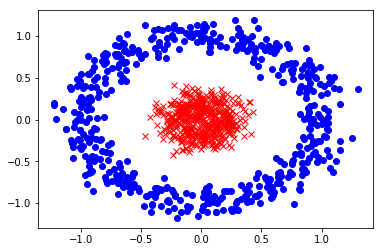

In [8]:
plt.plot(X[y==0,0], X[y==0,1],'ob')
plt.plot(X[y==1,0], X[y==1,1],'xr')

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [15]:
model = Sequential()

model.add(Dense(4,input_shape=(2,), activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [3]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X,y,epochs=40)

In [10]:
hticks, vticks = np.linspace(-1.5,1.5,101), np.linspace(-1.5,1.5,101)

In [11]:
aa,bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

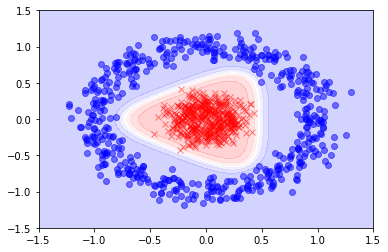

In [12]:
plt.plot(X[y==0,0], X[y==0,1],'ob', alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1],'xr',alpha=0.5)

plt.contourf(aa,bb,cc,cmap='bwr',alpha=0.2)

In [14]:
W= model.get_weights()

In [19]:
W

[array([[-4.6168313 ,  2.2545495 , -0.02581599,  2.2274933 ],
        [ 0.02803846,  3.8551493 , -0.01020898, -3.9014301 ]],
       dtype=float32),
 array([2.0245876, 2.0957484, 1.7558267, 2.0336525], dtype=float32),
 array([[ 5.313308 ],
        [ 5.2963004],
        [-2.793507 ],
        [ 5.268773 ]], dtype=float32),
 array([-6.9083624], dtype=float32)]

In [25]:
import pandas as pd
from keras.optimizers import Adam

In [21]:
data = pd.read_csv('../../data/weight-height.csv')

In [23]:
X = data[['Height']].values
y = data[['Weight']].values

In [24]:
model = Sequential()

In [35]:
model.add(Dense(1, input_shape=(1,)))
model.compile(Adam(lr=0.09), 'mean_squared_error')

In [ ]:
model.fit(X,y, epochs=40)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
model.fit(X_train, y_train, epochs=50)

In [37]:
y_train_pred=model.predict(X_train).ravel()
y_test_pred=model.predict(X_test).ravel()

In [43]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [42]:
mse(y_test, y_test_pred)
mse(y_train, y_train_pred)

172.73821482350792

In [46]:
r2_score(y_test, y_test_pred)
# r2_score(y_train, y_train_pred)

0.8335724209055263

# House price prediction

In [2]:
import pandas as pd

In [46]:
hous = pd.read_csv('../../data/housing-data.csv')

In [44]:
# hous = scaler.fit_transform(hous)

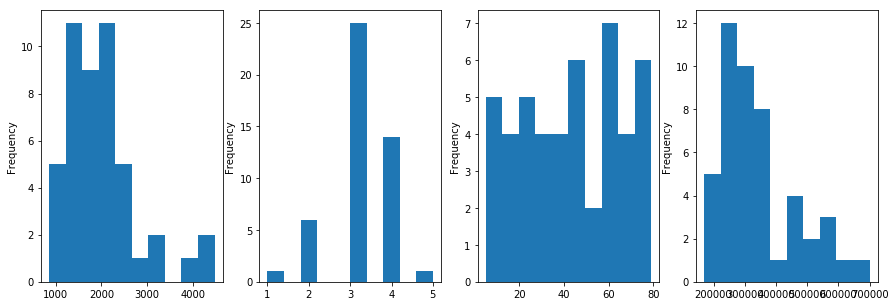

In [12]:
plt.figure(figsize=(15,5))
for i, feature in enumerate(hous.columns):
    plt.subplot(1,4,i+1)
    hous[feature].plot(kind='hist')
    

In [47]:
X = hous[['sqft', 'bdrms', 'age']].values
y = hous['price'].values

In [58]:
model = Sequential()

model.add(Dense(1,input_dim=3)) # shape = (no of features,)
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [18]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [73]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [74]:
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [75]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 0s 371us/step - loss: 0.0262
Epoch 2/50
37/37 [==============================] - 0s 262us/step - loss: 0.0499
Epoch 3/50
37/37 [==============================] - 0s 218us/step - loss: 0.0339
Epoch 4/50
37/37 [==============================] - 0s 215us/step - loss: 0.0296
Epoch 5/50
37/37 [==============================] - 0s 229us/step - loss: 0.0365
Epoch 6/50
37/37 [==============================] - 0s 302us/step - loss: 0.0276
Epoch 7/50
37/37 [==============================] - 0s 202us/step - loss: 0.0286
Epoch 8/50
37/37 [==============================] - 0s 121us/step - loss: 0.0269
Epoch 9/50
37/37 [==============================] - 0s 147us/step - loss: 0.0330
Epoch 10/50
37/37 [==============================] - 0s 149us/step - loss: 0.0366
Epoch 11/50
37/37 [==============================] - 0s 176us/step - loss: 0.0437
Epoch 12/50
37/37 [==============================] - 0s 185us/step - loss: 0.0286
Epoch 13/50
37/37 [======

In [76]:
from sklearn.metrics import r2_score

In [77]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [78]:
r2_score(y_train, y_train_pred)

0.46355094295012533

In [79]:
r2_score(y_test, y_test_pred)

0.7067356400193986